In [7]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pyspark.mllib.clustering import KMeans, KMeansModel

# create utility functions

In [20]:
def parseVector2(tuple):
    return np.array([tuple[0], tuple[1]])

# 產生sample data

In [21]:
x1 = [random.uniform(-3,-1) for i in range(30)]
y1 = [random.uniform(-0.5,0.5) for i in range(30)]
p1x = sc.parallelize(x1)
p1y = sc.parallelize(y1)
p1 = p1x.zip(p1y)

x2 = [random.uniform(-1,1) for i in range(30)]
y2 = [random.uniform(0.5,1.5) for i in range(30)]
p2x = sc.parallelize(x2)
p2y = sc.parallelize(y2)
p2 = p2x.zip(p2y)

x3 = [random.uniform(1,3) for i in range(30)]
y3 = [random.uniform(-0.5,0.5) for i in range(30)]
p3x = sc.parallelize(x3)
p3y = sc.parallelize(y3)
p3 = p3x.zip(p3y)

data = p1.union(p2).union(p3).map(parseVector2).cache()

In [23]:
data.first()

array([-2.40871227, -0.25138063])

# training

In [11]:
clusters = KMeans.train(data, 3, maxIterations=10, initializationMode="random")

# validation

In [27]:
clusters.centers

[array([ 1.96624695,  0.05332649]),
 array([-2.03124225, -0.10768516]),
 array([ 0.0239405 ,  1.05613835])]

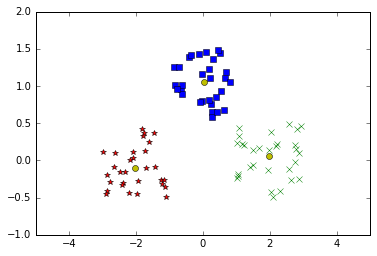

In [19]:
plt.axis([-5, 5, -1, 2])
plt.plot(x1,y1,'r*')
plt.plot(x2,y2,'bs')
plt.plot(x3,y3,'gx')

plt.plot(clusters.centers[0][0],clusters.centers[0][1],'yo')
plt.plot(clusters.centers[1][0],clusters.centers[1][1],'yo')
plt.plot(clusters.centers[2][0],clusters.centers[2][1],'yo')

# prediction

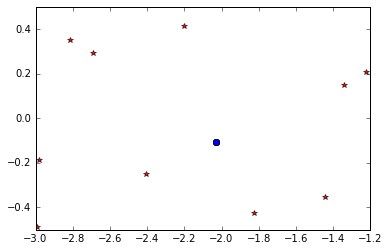

In [33]:
for p in data.take(10):
    predict = clusters.predict(p)
    plt.plot(clusters.centers[predict][0], clusters.centers[predict][1], 'bo')
    plt.plot(p[0],p[1],'r*')